In [ ]:
!gdown 1n7avPeTd2MORu6qUSuJrQD1EkU3mqzZ8

Downloading...
From: https://drive.google.com/uc?id=1n7avPeTd2MORu6qUSuJrQD1EkU3mqzZ8
To: /content/AirPassengers.csv
100% 1.75k/1.75k [00:00<00:00, 8.44MB/s]


Загрузите данные из источника по ссылке, ознакомьтесь с ними и подготовьте к аналитике

Найдите и удалите пропуски, если они есть.

Поменяйте тип столбца с временными отсечками в datetime.

Установите индексом данных столбец с временными отсечками и убедитесь, что он монотонно возрастает.

Проанализируйте временной ряд

Оставьте для аналитики лишь с 1952 по 1957 год (включительно).

Реализуйте разложение на компоненты тренда и сезонности. Визуализируйте результат разложения и сделайте выводы.

Есть ли тренд?

Есть ли сезонность и какая она (ежемесячная/ежеквартальная/ежегодная и т.д.)?

Является ли ряд стационарным и почему?

Постройте график, чтобы оценить автокорреляцию и сделайте выводы

У какого сдвига самая высокая автокорреляция?

Подтверждаются ли выводы о наличии тренда графиком автокорреляции?

Подготовьте данные к обучению линейной модели

Напишите функцию, которая будет генерировать новые признаки (календарные признаки, несколько колонок с разными сдвигами, несколько колонок с разными скользящими средними)

Воспользуйтесь наработками из скринкастов.

Добавьте аргумент, который будет отвечать за возможные сдвиги. Это должен быть список, по которому в цикле будет добавляться новая колонка lag_n, где n — число из этого списка, отвечающее за сдвиг.

Добавьте аргумент, который будет отвечать за возможные размеры скользящего среднего. Это должен быть список, по которому в цикле будет добавляться новая колонка rolling_mean_m, где m — число из этого списка, отвечающее за размер окна, по которому вычисляется среднее. Не забудьте, что скользящее среднее нужно сдвигать, чтобы не было «заглядывания в будущее».

Рассчитайте новые признаки с помощью реализованной функции, подав ей на вход произвольные параметры генерации новых признаков.

Удалите наблюдения с пропусками в новых переменных.

Разделите данные на признаки и целевую переменную.

Разделите данные на обучающую и валидационную части. Не забудьте, что валидационная часть должна идти строго после обучающей.

Обучите линейную модель машинного обучения и оцените ее качество

Обучите линейную модель на обучающей части данных.

Рассчитайте значение метрики качества MAE на обучающей и валидационных частях. Если модель работает плохо (метрика выше 20), попробуйте выделить другой набор признаков, вызывая свою функцию с новыми параметрами.

Визуализируйте реальный временной ряд и прогнозные значения. 

Оцените качество модели на отложенной выборке. В качестве отложенной выборки у нас будут наблюдения с 1958 по 1960 год

Возьмите из источника необходимый срез данных.

Подготовьте данные к прогнозированию.

Добавьте признаки с помощью реализованной ранее функции.

Удалите наблюдения с пропусками.

Если после удаления у вас осталось менее 36 наблюдений, откорректируйте срез из пункта 5.а.

 Отделите целевую переменную от признаков.

Постройте прогноз с помощью обученной ранее линейной модели.

Рассчитайте значение метрики качества на отложенной выборке.

Визуализируйте реальный временной ряд и прогнозные значения.

Значение метрики MAE на отложенной выборке должно быть не более 35.

In [ ]:
https://drive.google.com/file/d/1WYynCgt3B4UZ7LVCGmLwvdEOrutGSVTt/view?usp=sharing

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics import tsaplots
from statsmodels import api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [ ]:
data = pd.read_csv('AirPassengers.csv')
data.info()
data['Month'] = pd.to_datetime(data['Month'])
print(f'Временные данные монотонно возрастсают {data.index.is_monotonic_increasing}')
data.set_index('Month', inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB
Временные данные монотонно возрастсают True


Временные данные монотонно возрастают, пропусков нет

In [ ]:
df = data.loc['1952':'1957']

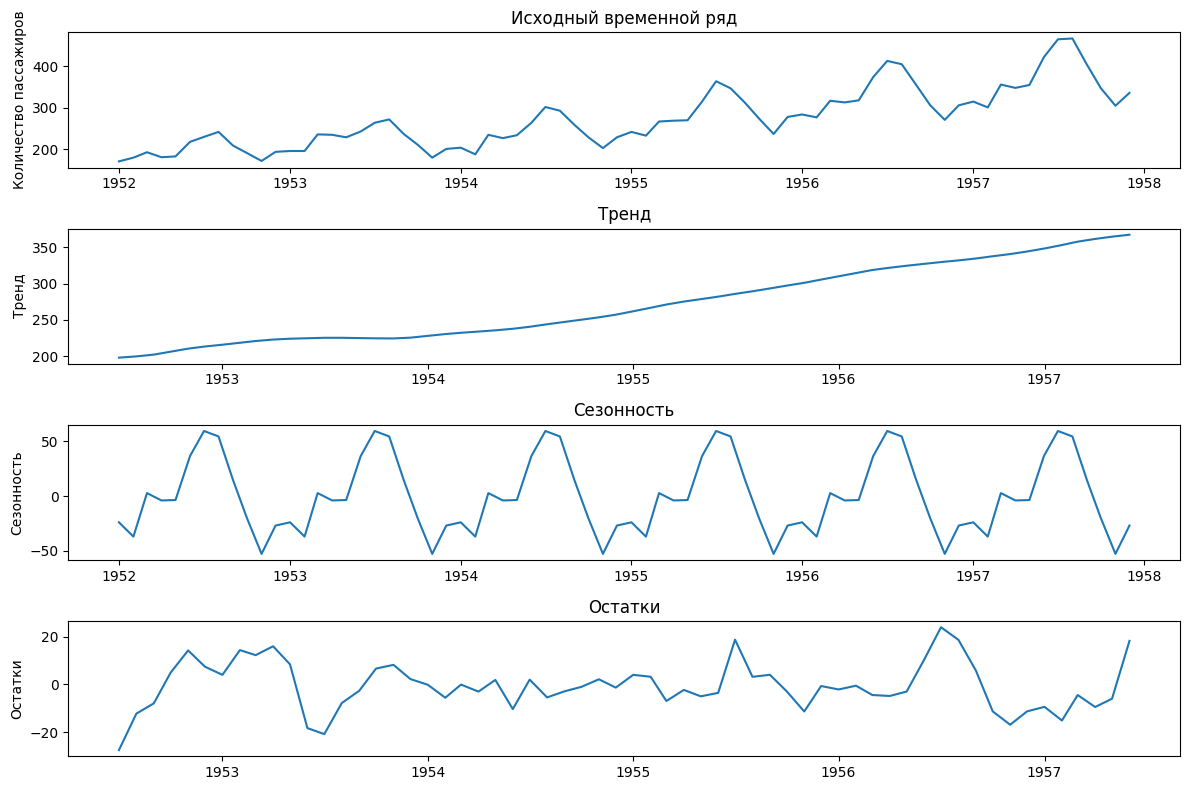

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Разложение на компоненты тренда и сезонности
decomposition = seasonal_decompose(df)

# Визуализация результатов разложения
plt.figure(figsize=(12, 8))

# Визуализация исходного временного ряда
plt.subplot(4, 1, 1)
plt.plot(df.index, df['#Passengers'])
plt.title('Исходный временной ряд')
plt.ylabel('Количество пассажиров')

# Визуализация тренда
plt.subplot(4, 1, 2)
plt.plot(df.index, decomposition.trend)
plt.title('Тренд')
plt.ylabel('Тренд')

# Визуализация сезонной составляющей
plt.subplot(4, 1, 3)
plt.plot(df.index, decomposition.seasonal)
plt.title('Сезонность')
plt.ylabel('Сезонность')

# Визуализация остатков (несистематическая, случайная составляющая)
plt.subplot(4, 1, 4)
plt.plot(df.index, decomposition.resid)
plt.title('Остатки')
plt.ylabel('Остатки')

plt.tight_layout()
plt.show()

График тренда показывает монотонный рост, тренд есть.

Есть ежегодная сезонность


Ряд не стационарен т.к. его среднее значение не изменяется во времени, т. е. временной ряд имеет тренд.

In [ ]:
acf = sm.tsa.acf(df['#Passengers'])
acf.shape

(19,)

In [ ]:
print(acf)
acf[12]

[1.         0.89400793 0.74549489 0.61531598 0.50234066 0.43030094
 0.38667    0.35354755 0.35686359 0.40011587 0.4555686  0.53720175
 0.58170785 0.49625454 0.37523856 0.27647025 0.19148319 0.13560224
 0.09421318]


0.5817078545799363

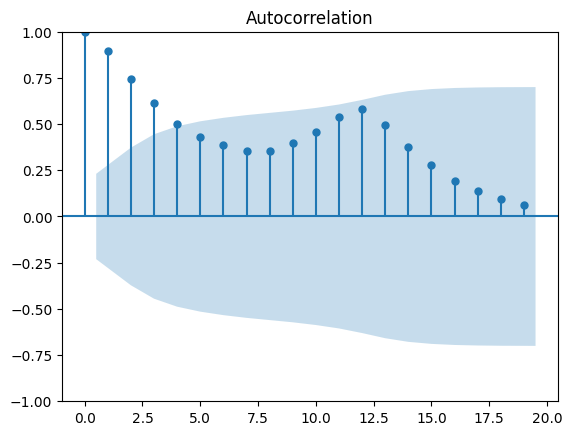

In [ ]:
fig =  sm.graphics.tsa.plot_acf(df['#Passengers'],lags=19)
plt.show()

Автокорреляция положительна на всем промежутке, что подтверждает наличие тренда.

Самая высокая автокорреляция у 12 сдвига

In [ ]:
def make_features(data, lag_list, rolling_mean_list):
    data['year'] = data.index.year
    data['month'] = data.index.month
    data['quarter'] = data.index.quarter

    for i in lag_list:
        data[f'lag_{i}'] = data['#Passengers'].shift(i)

    for i in rolling_mean_list:
      data[f'rolling_mean_{i}'] = data['#Passengers'].rolling(i).mean()
      data[f'rolling_mean_{i}'] = data[f'rolling_mean_{i}'].shift(1)

    return data

In [ ]:
data_with_features = make_features(df[['#Passengers']].copy(), [1,2,3], [1,2,3])
data_with_features.head(5)

,#Passengers,year,month,quarter,lag_1,lag_2,lag_3,rolling_mean_1,rolling_mean_2,rolling_mean_3
Month,,,,,,,,,,
1952-01-01,171,1952,1,1,NaN,NaN,NaN,NaN,NaN,NaN
1952-02-01,180,1952,2,1,171.0,NaN,NaN,171.0,NaN,NaN
1952-03-01,193,1952,3,1,180.0,171.0,NaN,180.0,175.5,NaN
1952-04-01,181,1952,4,2,193.0,180.0,171.0,193.0,186.5,181.333333
1952-05-01,183,1952,5,2,181.0,193.0,180.0,181.0,187.0,184.666667


MAE обучающей выборки: 16.745898813355453
MAE тестовой выборки:  24.216010145357274


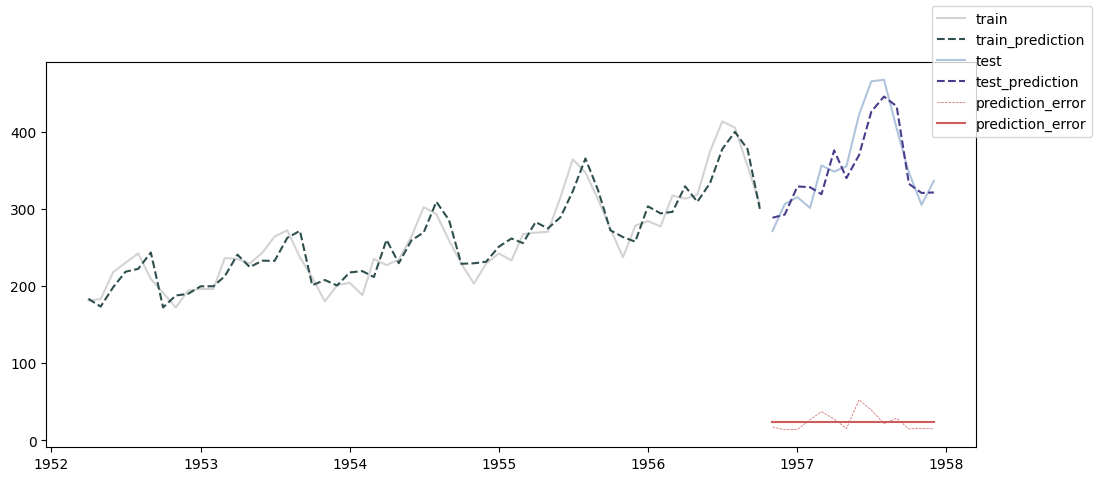

In [ ]:
def train_model(data_with_features):
  train, test = train_test_split(data_with_features.dropna(), shuffle=False, test_size=0.2)
  train = train.dropna()

  train_target = train['#Passengers']
  train_features = train.drop(['#Passengers'], axis=1)
  test_target = test['#Passengers']
  test_features = test.drop(['#Passengers'], axis=1)

  scaler = StandardScaler().fit(train_features)
  train_features_norm = scaler.transform(train_features)
  test_features_norm = scaler.transform(test_features)

  model = LinearRegression()
  model.fit(train_features_norm, train_target)

  train_prediction = pd.Series(model.predict(train_features_norm))
  train_prediction.index = train_features.index
  test_prediction = pd.Series(model.predict(test_features_norm))
  test_prediction.index = test_features.index

  print("MAE обучающей выборки:" ,mean_absolute_error(train_target, train_prediction))
  print("MAE тестовой выборки: " ,mean_absolute_error(test_target, test_prediction))

  fig, ax = plt.subplots(1, 1, figsize=[12, 5])

  error = abs(test['#Passengers'] - test_prediction)
  error_mean = pd.Series([error.mean()] * error.shape[0])
  error_mean.index = test.index

  ax.plot(train_target, c='lightgrey', label='train')
  ax.plot(train_prediction, c='darkslategrey', label='train_prediction', linestyle='--')
  ax.plot(test_target, c='lightsteelblue', label='test')
  ax.plot(test_prediction, c='darkslateblue', label='test_prediction', linestyle='--')
  ax.plot(error, c='indianred', linestyle='--', label='prediction_error', linewidth=0.5)
  ax.plot(error_mean, c='indianred', label='prediction_error')

  fig.legend();
  return model, scaler
train_model(data_with_features);

In [ ]:
lag_list = [i for i in range(1,20)]
rolling_mean_list = [i for i in range(1,20)]
data_with_features = make_features(df[['#Passengers']].copy(), lag_list, rolling_mean_list)
data_with_features.head()

,#Passengers,year,month,quarter,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,...,rolling_mean_10,rolling_mean_11,rolling_mean_12,rolling_mean_13,rolling_mean_14,rolling_mean_15,rolling_mean_16,rolling_mean_17,rolling_mean_18,rolling_mean_19
Month,,,,,,,,,,,,,,,,,,,,,
1952-01-01,171,1952,1,1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1952-02-01,180,1952,2,1,171.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1952-03-01,193,1952,3,1,180.0,171.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1952-04-01,181,1952,4,2,193.0,180.0,171.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1952-05-01,183,1952,5,2,181.0,193.0,180.0,171.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data_with_features.dropna().shape

(53, 42)

MAE обучающей выборки: 4.138162816519438
MAE тестовой выборки:  6.452649490743526


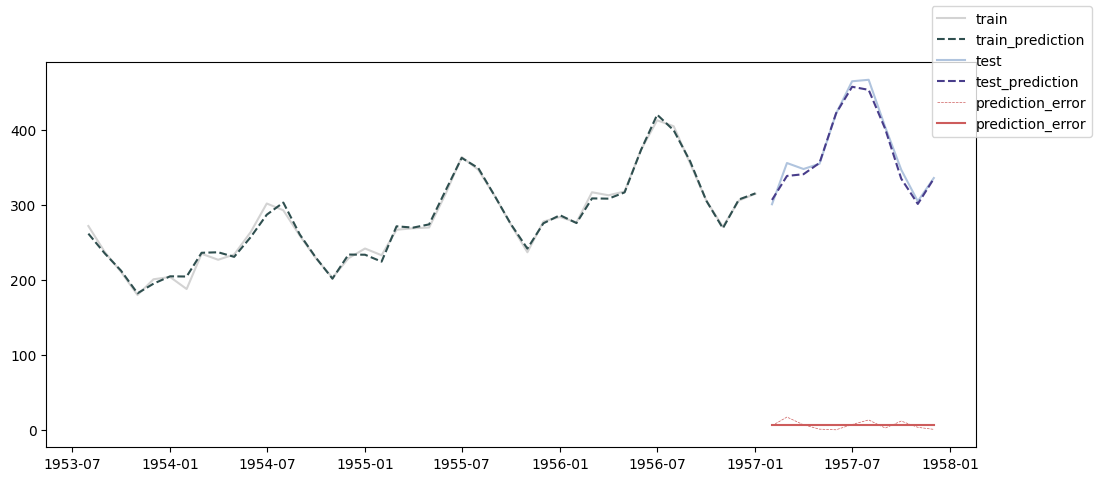

In [ ]:
model, scaler = train_model(data_with_features)

Удалось получить заявленное качество на обучающей и тестовой выборке

In [ ]:
coefficients = model.coef_

train_features = data_with_features.drop(['#Passengers'], axis=1)

coefficients_df = pd.DataFrame({'feature': train_features.columns, 'coefficient': coefficients})

sorted_coefficients_df = coefficients_df.sort_values(by='coefficient', ascending=False)

top_parameters = sorted_coefficients_df.head()

top_parameters

,feature,coefficient
14,lag_12,37.716135
2,quarter,25.246831
0,year,25.107718
7,lag_5,21.468327
13,lag_11,8.629116


Самым востребованным параметром оказался свдиг модели на год назад

In [ ]:
df_holdout = data.loc['1958':'1960']

MAE отложенной выборки: 11.027637282582063


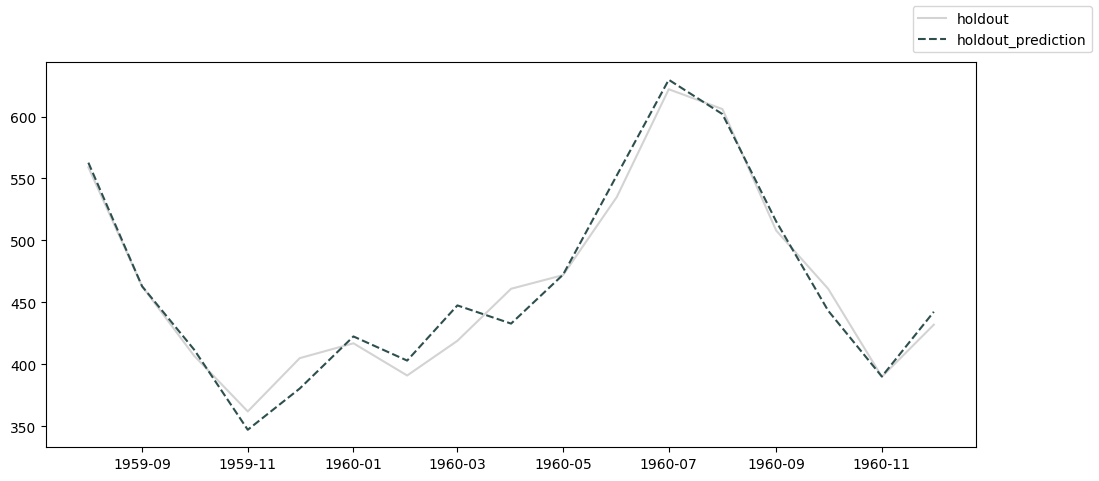

In [ ]:
data_with_features = make_features(df_holdout[['#Passengers']].copy(), lag_list, rolling_mean_list)
holdout = data_with_features.dropna()

holdout_target = holdout['#Passengers']
holdout_features = holdout.drop(['#Passengers'], axis=1)

holdout_features_norm = scaler.transform(holdout_features)

holdout_prediction = pd.Series(model.predict(holdout_features_norm))

holdout_prediction = pd.Series(model.predict(holdout_features_norm))
holdout_prediction.index = holdout_features.index

print("MAE отложенной выборки:" ,mean_absolute_error(holdout_target, holdout_prediction))
fig, ax = plt.subplots(1, 1, figsize=[12, 5])
ax.plot(holdout_target, c='lightgrey', label='holdout')
ax.plot(holdout_prediction, c='darkslategrey', label='holdout_prediction', linestyle='--')
fig.legend();

Удалось добиться требуемого качества на отложенной выборке